In [1]:
import os
from os.path import join, isdir, isfile, abspath, dirname, splitext, basename, split

from IPython.display import Markdown, display
from dotenv import load_dotenv
import numpy as np
import pandas as pd

from misc_util.pretty_print import pretty_print as print
from derive_conceptualspace.pipeline import CustomContext, SnakeContext, load_envfiles
from derive_conceptualspace.settings import ENV_PREFIX, get_setting

from misc_util.logutils import setup_logging
from misc_util.pretty_print import display, pretty_print as print
from derive_conceptualspace.util.threedfigure import ThreeDFigure
from derive_conceptualspace.semantic_directions.cluster_names import get_name_dict
from derive_conceptualspace.pipeline import SnakeContext, load_envfiles, cluster_loader
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs
from derive_conceptualspace.util.desc_object import DescriptionList
from derive_conceptualspace.evaluate.shallow_trees import classify_shallowtree

pd.options.display.float_format = '{:.3f}'.format

2022-04-12 10:41:22.518825: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/chris/Documents/JOBS/Uhrig-Gesture-Recog/skelshop_deps/openpose_cpu/build/src/openpose/
2022-04-12 10:41:22.518857: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<span style="font-size:11pt"></span>

## Analysis of different "measures of faithfulness of the separation"

In [2]:
setup_logging()
load_envfiles("siddata")
configs, print_cnf = getfiles_allconfigs("featureaxes", verbose=True)

<span style="font-size:11pt">There are 36 different parameter-combis for dataset <span style="color: #0000ff">siddata2022</span>:</span>

{'dataset': 'siddata2022',
 'language': 'de',
 'debug': 'False',
 'pp_components': ['mfauhcsd2', 'mfauhtcsldp'],
 'translate_policy': 'onlyorig',
 'min_words_per_desc': '80',
 'quantification_measure': ['ppmi', 'tfidf'],
 'embed_algo': 'mds',
 'embed_dimensions': ['3', '50', '200'],
 'extraction_method': 'tfidf',
 'dcm_quant_measure': ['count', 'ppmi', 'tfidf'],
 'kappa_weights': 'quadratic'}

In [11]:
configs = [c for c in configs if c["embed_dimensions"] != 3]
cnf = {'pp_components': 'mfauhcsd2', 'quantification_measure': 'tfidf', 'embed_dimensions': '200', 'dcm_quant_measure': 'count', 'classifier_succmetric': 'kappa_digitized_onlypos_2', 'sec_lambda': '0.2'}

<span style="font-size:11pt">conf_file demanded config QUANTIFICATION_MEASURE to be <span style="color: #ff0000">ppmi</span>, but force overwrites it to <span style="color: #0000ff">tfidf</span></span>

<span style="font-size:11pt">conf_file demanded config EMBED_DIMENSIONS to be <span style="color: #ff0000">50</span>, but force overwrites it to <span style="color: #0000ff">200</span></span>

<span style="font-size:11pt">conf_file demanded config CLASSIFIER_SUCCMETRIC to be <span style="color: #ff0000">kappa_rank2rank_onlypos_min</span>, but force overwrites it to <span style="color: #0000ff">kappa_digitized_onlypos_2</span></span>

<span style="font-size:11pt">conf_file demanded config SEC_LAMBDA to be <span style="color: #ff0000">0.1</span>, but force overwrites it to <span style="color: #0000ff">0.2</span></span>

<span style="font-size:11pt">Config-File /home/chris/Documents/UNI_neu/Masterarbeit/Derive_Conceptualspace/config/derrac2015_edited.yml loaded.</span>

<span style="font-size:11pt">Debug is active! #Items for Debug: 500</span>

<span style="font-size:11pt">Using a random seed: 1</span>

<span style="font-size:11pt">Running with the following settings [<span style="color: #009999">3ef8af7b39</span>]: CANDIDATE_MIN_TERM_COUNT: <span style="color: #ff0000">2</span>, CLASSIFIER: <span style="color: #0000ff">SVM</span>, CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">siddata2022</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #ff0000">True</span>, DEBUG_N_ITEMS: <span style="color: #ff0000">500</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">tfidf</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #0000ff">de</span>, MIN_WORDS_PER_DESC: <span style="color: #ff0000">80</span>, PP_COMPONENTS: <span style="color: #ff0000">mfauhcsd2</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, SEC_LAMBDA: <span style="color: #ff0000">0.2</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

<span style="font-size:11pt">The setting DEBUG was <span style="color: #ff0000">False</span> in a dependency and is <span style="color: #0000ff">True</span> here!</span>

<span style="font-size:11pt">The setting DEBUG was <span style="color: #ff0000">False</span> in a dependency and is <span style="color: #0000ff">True</span> here!</span>

<span style="font-size:11pt">The setting DEBUG was <span style="color: #ff0000">False</span> in a dependency and is <span style="color: #0000ff">True</span> here!</span>

<span style="font-size:11pt">The setting CANDIDATE_MIN_TERM_COUNT was <span style="color: #ff0000">25</span> in a dependency and is <span style="color: #0000ff">2</span> here!</span>

derive_conceptualspace/util/dtm_object.py:230: UserWarning: len(dtm) > DEBUG_N_ITEMS!!


<span style="font-size:11pt">The setting DEBUG was <span style="color: #ff0000">False</span> in a dependency and is <span style="color: #0000ff">True</span> here!</span>

Counting Occurences [verbose]: 100%|██████████| 10060/10060 [00:29<00:00, 339.36it/s]


<span style="font-size:11pt">Found 10060 candidate Terms, 10060 (100%) of which occur in at least 2 descriptions.</span>

<span style="font-size:11pt">The 25 terms that occur in the most descriptions (incl the #descriptions they occur in): seminar (5482), literatur (4201), sowie (4196), veranstaltung (3250), dabei (3165), sollen (2779), fragen (2651), teilnahme (2268), studierenden (2208), einfuhrung (2175), seminars (2101), studierende (2040), ersten (2022), grundlagen (1960), themen (1947), de (1935), uuml (1925), auml (1881), bzw (1812), ziel (1785), methoden (1757), lernen (1710), 10 (1708), anhand (1697), ouml (1687)</span>

<span style="font-size:11pt">Max value: Term <span style="color: #0000ff">nbsp</span> has value <span style="color: #0000ff">469.000</span> for doc <span style="color: #0000ff">Geschichte erleben – Umgang mit Menschen mit Behinderungen während der NS- Zeit B.1 (3)</span></span>

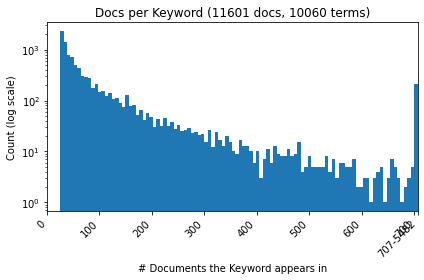

In [12]:
sample_ctx = SnakeContext.loader_context(config=cnf) #dict(debug=False, min_words_per_desc=80, dcm_quant_measure="count")
descriptions, dcm, embedding, featureaxes = sample_ctx.load("pp_descriptions", "filtered_dcm", "embedding", "featureaxes")
dcm.show_info(descriptions=descriptions)

In [27]:
%precision %.3f

def show_metrics(featureaxes, metric="kappa_rank2rank_onlypos_min", lamb1=0.5, lamb2=0.1):
    #I'm interested in:
    # *hat bin2bin/f_one ne hohe überschneidung mit anderen guten (kappa_rank2rank_onlypos_min, kappa_digitized_onlypos_2, kappa_count2rank_onlypos)
    # *was sind so die überschneidungen dieser guten 
    all_metrics = list(list(featureaxes["metrics"].values())[0].keys())
    print(all_metrics)
    one_metric = {k: v[metric] for k, v in featureaxes["metrics"].items()}
    one_metric = dict(sorted(one_metric.items(), reverse=True, key=lambda x : float('-inf') if np.isnan(x[1]) else x[1])) #https://stackoverflow.com/q/4240050/5122790
    t1 = {k: v for k, v in one_metric.items() if v >= lamb1}
    t2 = {k: v for k, v in one_metric.items() if v >= lamb2 and k not in t1.keys()}
    print(f"Lamb1: {lamb1} with {len(t1)} entries | Lamb2: {lamb2} with {len(t2)} entries | others: {len(one_metric)-len(t1)-len(t2)}")
    display(t1)
    print("="*50)
    display(t2)

def highlight_nonzero_max(data):
    #df.style.apply(highlight_nonzero_max, axis=0), https://stackoverflow.com/a/62639983/5122790
    #df.style.highlight_max(color='lightgreen', axis=0)
    return [f'font-weight: bold' if v == data.max() and v > 0 else '' for v in data]

def generate_comparertable(metrics, maxval=1.1, minval=0.5):
    all_metrics = list(list(metrics.values())[0].keys())
    t1_permetric = {}
    for metric in all_metrics:
        one_metric = {k: v[metric] for k, v in metrics.items()}
        one_metric = dict(sorted(one_metric.items(), reverse=True, key=lambda x : float('-inf') if np.isnan(x[1]) else x[1])) #https://stackoverflow.com/q/4240050/5122790
        t1 = {k: v for k, v in one_metric.items() if v >= minval and v < maxval}
        t1_permetric[metric] = set(t1.keys())
    t1_table = np.zeros([len(t1_permetric), len(t1_permetric)])
    for n1, k1 in enumerate(t1_permetric.values()):
        for n2, k2 in enumerate(t1_permetric.values()):
            t1_table[n1,n2] = len(k1&k2)/len(k1) if len(k1) > 0 else 0
    columns = [i.replace("kappa", "k").replace("dense", "d").replace("rank2rank", "r2r").replace("count2rank", "c2r").replace("bin2bin", "b2b").replace("f_one", "f1").replace("digitized", "dig").replace("_onlypos", "+") for i in t1_permetric.keys()]
    df = pd.DataFrame(t1_table, columns=columns, index=[f"{i} ({len(list(t1_permetric.values())[n])})" for n, i in enumerate(columns)])
    df.values[tuple([np.arange(df.shape[0])]*2)] = np.nan
    return df

In [10]:
show_metrics(featureaxes, lamb1=0.3, lamb2=0.05)
#I'm interested in:
# *hat bin2bin/f_one ne hohe überschneidung mit anderen guten (kappa_rank2rank_onlypos_min, kappa_digitized_onlypos_2, kappa_count2rank_onlypos)
# *was sind so die überschneidungen dieser guten 

<span style="font-size:11pt">['accuracy', 'precision', 'recall', 'did_converge', 'f_one', 'kappa_rank2rank_dense', 'kappa_rank2rank_min', 'kappa_bin2bin', 'kappa_digitized', 'kappa_count2rank_onlypos', 'kappa_rank2rank_onlypos_dense', 'kappa_rank2rank_onlypos_min', 'kappa_rank2rank_onlypos_max', 'kappa_digitized_onlypos_2']</span>

<span style="font-size:11pt">Lamb1: 0.3 with 470 entries | Lamb2: 0.05 with 4492 entries | others: 5098</span>

{'uni bremen': 0.662,
 'bremen de': 0.654,
 'bremen': 0.645,
 'betreuer': 0.628,
 'uni bremen de': 0.627,
 'mediation': 0.618,
 'interkulturelles lernen': 0.608,
 'haupt realschule': 0.597,
 'schulpraktikum': 0.585,
 'html': 0.583,
 'the': 0.582,
 'semesterhalfte': 0.580,
 'pr uuml fung': 0.572,
 'uhr raum 41': 0.572,
 'lehrwerk': 0.563,
 'ungefahr': 0.562,
 'cher': 0.553,
 'windows': 0.551,
 'pro semester': 0.550,
 'ubergreifende': 0.547,
 'sterben': 0.546,
 'artikulation': 0.544,
 'tiere': 0.544,
 'physischen geographie': 0.542,
 'economics': 0.537,
 'uuml fung': 0.534,
 'of': 0.533,
 'technische mechanik': 0.533,
 'nbsp pr uuml': 0.526,
 'teilnehmen mochten': 0.526,
 'gelernten': 0.524,
 'fung': 0.518,
 'https': 0.518,
 'geographen': 0.515,
 'zusammen gestellt': 0.512,
 'interkulturelles': 0.512,
 'suffixe': 0.503,
 'textsammlung': 0.502,
 'migration': 0.501,
 'tandem': 0.499,
 'nbsp pr': 0.497,
 'schulwesens': 0.495,
 'and': 0.492,
 'biophysik': 0.488,
 'fink': 0.487,
 'https www':

<span style="font-size:11pt">==================================================</span>

{'12': 0.300,
 'padagogik': 0.300,
 'kompetent': 0.299,
 'frankfurt suhrkamp': 0.299,
 'publikation': 0.299,
 'zusammenfassungen': 0.299,
 'interkultureller': 0.299,
 'fontane': 0.299,
 'qualitative': 0.299,
 '134': 0.298,
 'vorlesung richtet studierende': 0.298,
 '2019': 0.298,
 'medien': 0.298,
 'analog': 0.298,
 'differenzierten': 0.297,
 'teilgebiete': 0.297,
 'erfolgreichen scheinerwerb': 0.297,
 'bourdieu': 0.297,
 'selbstmanagement': 0.296,
 '07': 0.296,
 'kirchen': 0.296,
 'europaische': 0.296,
 'forschungsthemen': 0.296,
 'geistige': 0.296,
 'subjekte': 0.295,
 'auflage': 0.295,
 '06': 0.295,
 'verhandlung': 0.295,
 'ber': 0.295,
 'kritisch reflektieren': 0.294,
 'anlehnung': 0.294,
 'lesefahigkeit': 0.294,
 'zusammengefasst': 0.294,
 'prapositionen': 0.294,
 'verona': 0.293,
 'tier': 0.293,
 'hannover': 0.293,
 'grundschule': 0.292,
 'praktischen uuml bungen': 0.292,
 'forschungsmethoden': 0.291,
 'briefe': 0.291,
 'bgb': 0.291,
 'university press': 0.291,
 'theodor': 0.291,


In [35]:
df = generate_comparertable(sample_ctx.obj["featureaxes"]["metrics"], minval=0.5)
df.style.apply(highlight_nonzero_max, axis=1).format(precision=3)
#look at combis of bin2bin, f_one, k_r2r+_min, k_dig+_2, k_c2r+

,accuracy,precision,recall,did_converge,f1,k_r2r_d,k_r2r_min,k_b2b,k_dig,k_c2r+,k_r2r+_d,k_r2r+_min,k_r2r+_max,k_dig+_2
accuracy (10060),nan,0.166,1.000,0.946,0.314,0.000,0.000,0.303,0.000,0.000,0.000,0.024,0.010,0.100
precision (1668),1.000,nan,1.000,0.979,1.000,0.000,0.001,0.998,0.000,0.002,0.000,0.084,0.051,0.126
recall (10060),1.000,0.166,nan,0.946,0.314,0.000,0.000,0.303,0.000,0.000,0.000,0.024,0.010,0.100
did_converge (9514),1.000,0.172,1.000,nan,0.323,0.000,0.000,0.312,0.000,0.000,0.000,0.024,0.011,0.103
f1 (3155),1.000,0.529,1.000,0.973,nan,0.000,0.001,0.967,0.000,0.001,0.000,0.067,0.032,0.140
k_r2r_d (0),0.000,0.000,0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
k_r2r_min (2),1.000,1.000,1.000,1.000,1.000,0.000,nan,1.000,0.000,0.000,0.000,0.000,0.000,0.000
k_b2b (3052),1.000,0.546,1.000,0.973,1.000,0.000,0.001,nan,0.000,0.001,0.000,0.068,0.033,0.141
k_dig (0),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000
k_c2r+ (4),1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,nan,0.000,1.000,1.000,0.250


In [36]:
styler = lambda df: df.style.apply(highlight_nonzero_max, axis=1).format(precision=3)
resizebox=True
bold_keys=True
rotate=False
rotate_index=False
caption=None

rotate = str(rotate) if rotate is not False else False
df = df.copy()
if bold_keys:
    if df.index.names != [None]:
        indexnames = ["\\textbf{"+i+"}" for i in df.index.names]
        if rotate and rotate_index: indexnames = ["\\rotatebox{"+rotate+"}{"+i+"}" for i in indexnames]
        df.index = pd.MultiIndex.from_tuples([["\\textbf{"+str(j)+"}" for j in i] for i in df.index], names=indexnames)
    if df.index.names != [None]:
        indexnames = ["\\textbf{"+i+"}" for i in df.columns.names[1:]]
        if rotate and rotate_index: indexnames = ["\\rotatebox{"+rotate+"}{"+i+"}" for i in indexnames]
        df.columns = pd.MultiIndex.from_tuples([["\\textbf{"+str(j)+"}" for j in i[1:]] for i in df.columns], names=indexnames)
    else:
        df.columns = ["\\textbf{"+(str(i[1]) if isinstance(i, (list, tuple)) else i)+"}" for i in df.columns] #i[1] if it's a named index
res = styler(df)
if rotate: res.applymap_index(lambda v: "rotatebox:{"+rotate+"}--rwrap--latex;", axis=1)
txt = res.to_latex(convert_css=True, clines="skip-last;index", multirow_align="t", hrules=True, siunitx=False, caption=caption)
txt = [i for i in txt.split("\n") if i != "\\thtop"]
if resizebox: txt = [txt[0]]+["\\resizebox{\\textwidth}{!}{%"]+txt[1:-2]+["}"]+txt[-2:]
for nrow in range(len(txt)-1):
    if txt[nrow].startswith("\\cline") and txt[nrow+1] == "\\bottomrule":
        txt[nrow] = ""
txt = "\n".join([i for i in txt if i]).replace("nan", "-")
txt = txt.replace("≥", "$\\geq$").replace("%", "\%")

builtins.print(txt)

\begin{tabular}{lrrrrrrrrrrrrrr}
\resizebox{\textwidth}{!}{\%
\toprule
 & \textbf{accuracy} & \textbf{precision} & \textbf{recall} & \textbf{did_converge} & \textbf{f1} & \textbf{k_r2r_d} & \textbf{k_r2r_min} & \textbf{k_b2b} & \textbf{k_dig} & \textbf{k_c2r+} & \textbf{k_r2r+_d} & \textbf{k_r2r+_min} & \textbf{k_r2r+_max} & \textbf{k_dig+_2} \\
\midrule
accuracy (10060) & - & 0.166 & \bfseries 1.000 & 0.946 & 0.314 & 0.000 & 0.000 & 0.303 & 0.000 & 0.000 & 0.000 & 0.024 & 0.010 & 0.100 \\
precision (1668) & \bfseries 1.000 & - & \bfseries 1.000 & 0.979 & \bfseries 1.000 & 0.000 & 0.001 & 0.998 & 0.000 & 0.002 & 0.000 & 0.084 & 0.051 & 0.126 \\
recall (10060) & \bfseries 1.000 & 0.166 & - & 0.946 & 0.314 & 0.000 & 0.000 & 0.303 & 0.000 & 0.000 & 0.000 & 0.024 & 0.010 & 0.100 \\
did_converge (9514) & \bfseries 1.000 & 0.172 & \bfseries 1.000 & - & 0.323 & 0.000 & 0.000 & 0.312 & 0.000 & 0.000 & 0.000 & 0.024 & 0.011 & 0.103 \\
f1 (3155) & \bfseries 1.000 & 0.529 & \bfseries 1.000 & 0.97

* bin2bin und f1 haben sehr hohe überschneidung (bin2bin ist aber strenger)
* k_r2r+_min and k_dig+_2 have the exact same results
* k_r2r+_min and k_c2r+ don't have too high of an overlap
* ALL of k_r2r+_min/k_dig+_2 (16), k_c2r+ (9) are in b2b
* ALL of the onlypos-statistics are completely in the respective kappa bin2bin

In [15]:
generate_comparertable(sample_ctx.obj["featureaxes"]["metrics"], minval=0.1)

,accuracy,precision,recall,did_converge,f1,k_r2r_d,k_r2r_min,k_b2b,k_dig,k_c2r+,k_r2r+_d,k_r2r+_min,k_r2r+_max,k_dig+_2
accuracy (10060),nan,0.854,1.000,0.946,0.994,0.000,0.033,0.975,0.009,0.003,0.001,0.454,0.187,0.499
precision (8592),1.000,nan,1.000,0.954,1.000,0.000,0.039,1.000,0.011,0.004,0.002,0.488,0.218,0.525
recall (10060),1.000,0.854,nan,0.946,0.994,0.000,0.033,0.975,0.009,0.003,0.001,0.454,0.187,0.499
did_converge (9514),1.000,0.862,1.000,nan,0.995,0.000,0.033,0.978,0.010,0.003,0.001,0.455,0.189,0.502
f1 (10001),1.000,0.859,1.000,0.947,nan,0.000,0.033,0.981,0.009,0.003,0.001,0.456,0.188,0.500
k_r2r_d (0),0.000,0.000,0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
k_r2r_min (332),1.000,1.000,1.000,0.946,1.000,0.000,nan,1.000,0.111,0.000,0.000,0.886,0.524,0.340
k_b2b (9813),1.000,0.876,1.000,0.948,1.000,0.000,0.034,nan,0.009,0.003,0.001,0.463,0.192,0.506
k_dig (93),1.000,1.000,1.000,1.000,1.000,0.000,0.398,1.000,nan,0.000,0.000,0.656,0.548,0.699
k_c2r+ (32),1.000,1.000,1.000,0.969,1.000,0.000,0.000,1.000,0.000,nan,0.406,1.000,1.000,0.969


In [17]:
generate_comparertable(sample_ctx.obj["featureaxes"]["metrics"], minval=0.1, maxval=0.5)

,accuracy,precision,recall,did_converge,f1,k_r2r_d,k_r2r_min,k_b2b,k_dig,k_c2r+,k_r2r+_d,k_r2r+_min,k_r2r+_max,k_dig+_2
accuracy (845),nan,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.212,0.072,0.084
precision (414),0.000,nan,0.000,0.000,0.983,0.000,0.188,0.705,0.000,0.000,0.000,0.287,0.138,0.007
recall (8),0.125,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.250
did_converge (0),0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
f1 (930),0.001,0.438,0.000,0.000,nan,0.000,0.076,0.481,0.000,0.000,0.000,0.240,0.116,0.008
k_r2r_d (0),0.000,0.000,0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
k_r2r_min (84),0.000,0.929,0.000,0.000,0.845,0.000,nan,0.905,0.000,0.000,0.000,0.500,0.333,0.000
k_b2b (453),0.000,0.645,0.000,0.000,0.987,0.000,0.168,nan,0.000,0.000,0.000,0.256,0.172,0.015
k_dig (0),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000
k_c2r+ (11),0.091,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,0.364,0.727,0.818,0.636
